In [5]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import os
df = pd.concat([pd.read_json('dataset/'+file, lines=True) for file in os.listdir('dataset') ]).reset_index(drop=True, inplace=False)

df = df[~(df['url'] == 'http://adressa.no')]

In [6]:
def fix_none(col_name):
    d = df.loc[(df[col_name].isna()) | (df[col_name].isnull()), ['url', col_name]].drop_duplicates()
    d = pd.DataFrame(d)
    
    urls = list(d['url'])
    
    elements = pd.DataFrame(df.loc[df['url'].isin(urls) & (df[col_name].isna() == False), ['url', col_name]].drop_duplicates())
    
    for index, row in elements.iterrows():
        df.loc[df['url'] == row['url'], col_name] = row[col_name]

In [241]:
def fix_all_none(col_names):
    for col_name in col_names:
        fix_none(col_name)

In [242]:
fix_all_none(['category', 'documentId', 'publishtime'])

In [14]:
df['activeTime'].fillna(0, inplace=True)

In [26]:
import matplotlib.pyplot as plt
documents = df[['documentId', 'category', 'title', 'url', 'publishtime']]
users = df[['userId', 'documentId', 'activeTime', 'time']]
# events = df[['eventId', 'userId', '']]
data = df[['userId', 'documentId', 'activeTime']].sort_values(['userId', 'documentId'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157137 entries, 2162806 to 2205530
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   userId      1157137 non-null  object 
 1   documentId  788931 non-null   object 
 2   activeTime  1157137 non-null  float64
dtypes: float64(1), object(2)
memory usage: 35.3+ MB


In [16]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(data, reader)

In [17]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.20)

In [18]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [19]:
predictions = algo.test(testset)
predictions

[Prediction(uid='cx:rkd8fj3fs64zyzr19x9warh1:3iqblm8u800aa', iid='175e539ab0f1d8a303ade67fa419492f278556a6', r_ui=44.0, est=5, details={'was_impossible': False}),
 Prediction(uid='cx:iirmlgpm6dmd6rhj:r65v7je9a5y5', iid='c4ba4c7680ced5beb207e7854f355705422c2b29', r_ui=48.0, est=5, details={'was_impossible': False}),
 Prediction(uid='cx:hs7h3paoeouj0j2x:1efjgd5w4gbbx', iid='99ae874b5f0c9e3e1f0f1f40569652689719a27d', r_ui=0.0, est=5, details={'was_impossible': False}),
 Prediction(uid='cx:iixmwimeypiywac5:1tnl58cwjw9gi', iid='ff9704d73150a5f14bbad454f4f6e0f252f49521', r_ui=449.0, est=5, details={'was_impossible': False}),
 Prediction(uid='cx:ilci32s5jzhxgdwf:2qur4fhg4shzx', iid=None, r_ui=0.0, est=5, details={'was_impossible': False}),
 Prediction(uid='cx:3okrm8mat6rgbmqwesx9x995d:ndxt4uvthk0m', iid='66a769fe727fd5f87dc54780eefb2ea912df5d51', r_ui=47.0, est=5, details={'was_impossible': False}),
 Prediction(uid='cx:imchwu246sj0rcvu:1u9q5b14cffmy', iid=None, r_ui=0.0, est=5, details={'was_

In [22]:
accuracy.rmse(predictions)

RMSE: 75.3666


75.36659668569975

In [275]:
df.set_index('userId')
df = df[~df['documentId'].isnull()]
df.drop_duplicates(subset=['userId', 'documentId'], inplace=True)
test = df.pivot(index='userId', columns='documentId', values='activeTime').fillna(value=0, inplace=False)
test

documentId,0006b2caef9ae801cfa0a48ec737544241ec4dca,00098cc438af89c1ba8fb6a37035af2e2f606ce3,000b8a3813a9ae59e9e14641ddcdfbd910aa6b76,000fd9e1ee3153e955d5e64b35691d799189aa2d,001b555b5fad3b0390f6f305bafcde1d3bdc5fc3,0020dd5ded93f94d4d078151a7733bb8410838fd,0022652ffa4a9f8a041b5b4fb7591aacda920d31,0023cf8c8637599ee493463a429f4af62817cf3a,002472431520087fcb7bc36fc544495885e8ab39,002536e7cb357867c9d935353b3a3b046a6766fa,...,ffe116360c76b3f0ead618448b019cf35d22134a,ffe19ee6d15dc317d14160d8e8bd403e157cb4d4,ffe2bf4a96bbebd29206bcc777148bbcee8636c4,ffe3325c0842dbb153b888fef0ad1616e9c0d30e,ffe7344b2550c475de286de0f34da337b1af1851,ffe93cc30458ece7dc3ebf6a61e07d1d71e3bb6e,ffea2777d7703dc7307e9a6333657cfb4bf6131e,ffeea037b0cf89ab7b2ad06d1494537fb7b9954d,fff0ee44bb6de4dcab4828abfa90302af0f30d36,fffcc5d96f6d91418c68b17c191eb25093947b37
userId,,,,,,,,,,,,,,,,,,,,,
cx:10k2wzm1b3jsk2y5ym1utnjo97:2kefzqaxe9jx7,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.00000,0.0,0.0,0.0,0.00000,0.0
cx:11asuyo07mbi13b849lp87hlje:1i9z1hu1xx694,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
cx:13077170178592105431908:2so1nc52xur4d,0.0,0.00000,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
cx:13082126012361420762846:3nhzg71lk2zqc,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
cx:13082926635761580649288:30q2cgmwa3mzi,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,115.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx:ymgd4qz84t6z31b22zecmrpz3:2bclyyq01sfwd,0.0,68.07149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
cx:ywxiqgtmxyfc24eqhyzpz7jer:28kehwib7kyi8,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
cx:z5nmgvym79d91yxajr8rncjp3:dd23bgkvv19x,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0


In [276]:
test.shape

(1000, 20344)

In [277]:
X = test.values.T
X.shape

(20344, 1000)

In [292]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

SVD = TruncatedSVD(n_components=12, random_state=17)
pearson_r_coeff = SVD.fit_transform(X)
pearson_r_coeff
# X_train, X_test, y_train, y_test = train_test_split(df, df.index, test_size=0.20, random_state=42)
# t = SVD.fit_transform(X_train)

array([[ 2.52096264e+01, -2.39244219e+01,  7.18317602e+00, ...,
        -1.98921347e-02, -1.92436051e+00,  5.56532484e+00],
       [ 9.63243785e+00,  2.74772205e+00,  1.07852045e+01, ...,
        -5.97053039e+00,  8.77139152e-01, -4.52048956e+00],
       [ 3.69055462e+00, -3.53208070e+00, -2.74920579e+00, ...,
        -1.39466298e-01, -2.18779125e+00, -3.85250790e+00],
       ...,
       [ 2.37551380e+00,  1.03802265e+00, -2.62228510e+00, ...,
        -1.70927588e+00,  3.49119881e+00, -2.70871496e+00],
       [ 6.27318813e+02,  3.74950736e+01,  2.39905984e+02, ...,
         3.18642034e+01, -1.16481237e+02, -7.94661627e+01],
       [ 1.39703883e+00, -1.18814355e+00, -5.35056678e-01, ...,
         4.61504086e-01,  6.35949934e-01, -8.21712289e-01]])

<AxesSubplot:>

/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


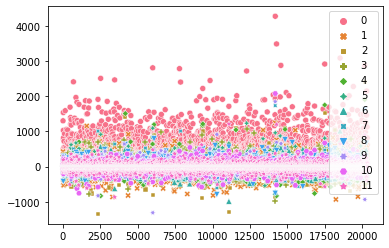

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pearson_r_coeff)

In [282]:
import numpy as np
corr = np.corrcoef(pearson_r_coeff)
corr

array([[ 1.        ,  0.0967724 ,  0.45668226, ..., -0.21163059,
         0.40222319,  0.59148018],
       [ 0.0967724 ,  1.        ,  0.06957331, ...,  0.46852519,
         0.50066773,  0.38421246],
       [ 0.45668226,  0.06957331,  1.        , ..., -0.02206724,
         0.42453701,  0.41762706],
       ...,
       [-0.21163059,  0.46852519, -0.02206724, ...,  1.        ,
         0.22796015,  0.42489171],
       [ 0.40222319,  0.50066773,  0.42453701, ...,  0.22796015,
         1.        ,  0.28154839],
       [ 0.59148018,  0.38421246,  0.41762706, ...,  0.42489171,
         0.28154839,  1.        ]])

In [ ]:
docIds = test.columns
docIdsList = list(docIds)